In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
%matplotlib inline

In [34]:
from rioniso.model import IsoCurve
from rioniso.importdata import ImportData
from rioniso.plotters import Plotters

In [6]:
exp_data_file = '/home/duskdawn/Downloads/72Ge-10-11s-2to21-2nd.npz'
simulated_data_file = '/home/duskdawn/analysis/72Ge/segundo-set-2023/72ge-2nd-off-isocurveinfo.ods'

In [7]:
imported_data = ImportData(simulated_data_file, exp_data_file, 10)

In [27]:
iso_data = IsoCurve(imported_data.simulated_data, imported_data.experimental_data)

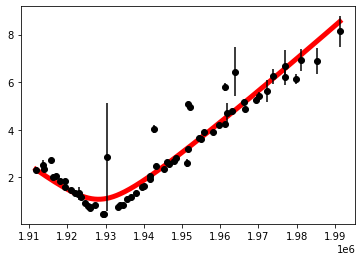

In [36]:
plots = Plotters(iso_data.iso_data, iso_data.fit_range, iso_data.fit_values)